**Prática de Segmentação de imagens**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as ma

def gauss(img,n,m,sigma):

    fator = 1 / ma.sqrt(2 * ma.pi * sigma**2)

    sum = (float)(0)

    mat = np.zeros((n, m))

    a = (int)((n - 1) / 2)
    b = (int)((m - 1) / 2)

    x = (int)(-a)
    while(x <= a):
        y = (int)(-b)
        while(y <= b):

            mat[x + a,y + b] = fator * ma.exp(-((x**2 + y**2) / (2 * sigma**2)))

            sum += mat[x + a][y + b]

            y += 1
        x += 1

    mat = mat / sum

    return filtragem(img, mat, False)

def filtragem(img, mat, inv):

    lin = img.shape[0]    
    col = img.shape[1]

    n = mat.shape[0]
    m = mat.shape[1]

    a = (int)((n - 1) / 2)
    b = (int)((m - 1) / 2)

    img_pad = np.zeros((lin + 2 * a, col + 2 * b))
    img_pad[a:lin+a,a:col+a] = img

    img2 = np.zeros((lin, col))

    if(inv == False):

        x = (int)(a)
        while(x < lin + a):
            y = (int)(b)
            while(y < col + b):
                s = (int)(-a)
                while(s <= a):
                    t = (int)(-b)
                    while(t <= b):
                        img2[x - a,y - b] += img_pad[x + s, y + t] * mat[s + a, t + b]
                        t += 1
                    s += 1
                y += 1
            x += 1

    else:

        x = (int)(a)
        while(x < lin + a):
            y = (int)(b)
            while(y < col + b):
                s = (int)(-a)
                while(s <= a):
                    t = (int)(-b)
                    while(t <= b): 
                        img2[x - a,y - b] += img_pad[x - s, y - t] * mat[s + a, t + b]
                        t += 1
                    s += 1
                y += 1
            x += 1
    
    return img2

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

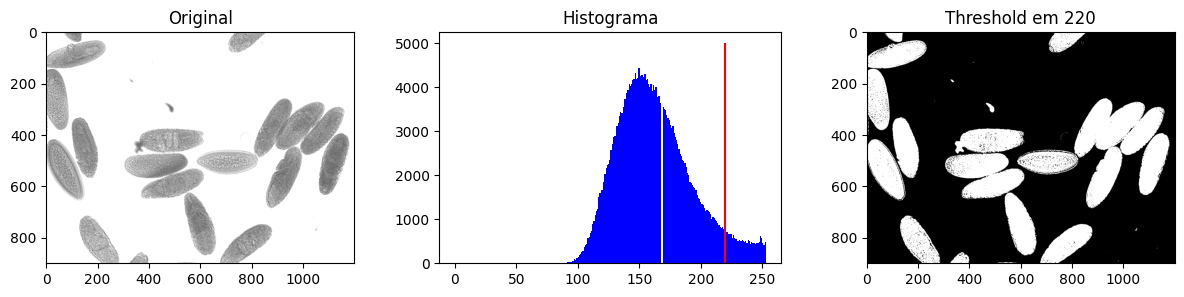

In [2]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.title('Histograma')
plt.hist(img1.ravel(),256,[0,253], color = 'blue')

t = (int)(220)

plt.vlines(x = t, ymin = 0, ymax = 5000, color = "red")

img2 = 255 * (img1 <= t)

plt.subplot(1, 3, 3)
plt.title('Threshold em ' + (str)(t))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

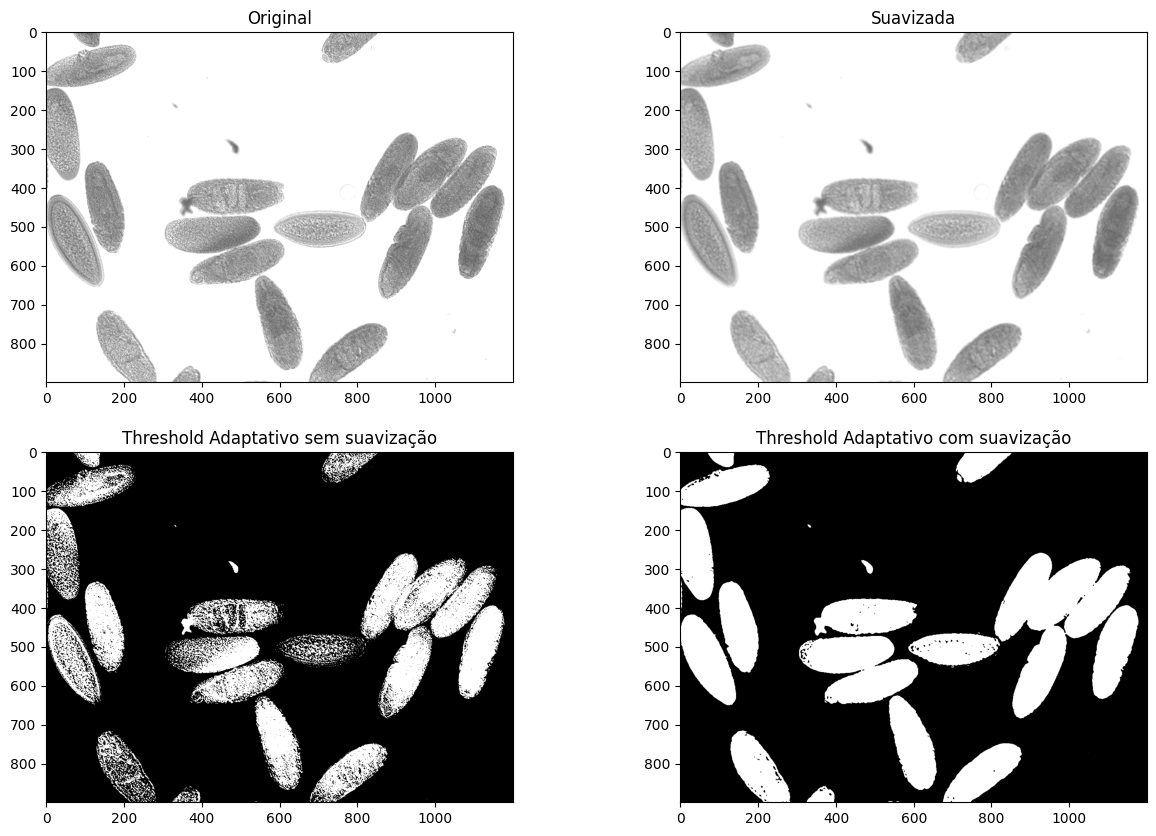

In [3]:
INF = (float)(1000000)
EPS = 0.1

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.blur(img1, ksize = (5,5));

hist = cv2.calcHist([img1],[0],None,[256],[0,256]).astype(int)
hist = hist[::,0]

t = (np.min(img1).astype(int) + np.max(img1).astype(int)) / 2.0
antt = INF

while(abs(antt - t) > EPS):

    antt = t

    intt = (int)(t)

    a = hist[0:intt+1]
    b = hist[intt+1:256]

    m1 = (float)(0)
    q1 = (int)(0)
    i = (int)(0)
    while(i <= intt):
        m1 += (float)(i * a[i])
        q1 += a[i]
        i += 1

    m2 = (float)(0)
    q2 = (int)(0)
    while(i < 256):
        p = (int)(i - (t + 1)) 
        m2 += (float)(i * b[p])
        q2 += b[p]
        i += 1

    if(q1 != 0):
        m1 = m1 / q1
    
    if(q2 != 0):
        m2 = m2 / q2

    t = (m1 + m2) / 2.0

t = (int)(round(t))

img3 = 255 * (img1 <= t)

hist = cv2.calcHist([img2],[0],None,[256],[0,256]).astype(int)
hist = hist[::,0]

t = (np.min(img2).astype(int) + np.max(img2).astype(int)) / 2.0
antt = INF

while(abs(antt - t) > EPS):

    antt = t

    intt = (int)(t)

    a = hist[0:intt+1]
    b = hist[intt+1:256]

    m1 = (float)(0)
    q1 = (int)(0)
    i = (int)(0)
    while(i <= intt):
        m1 += (float)(i * a[i])
        q1 += a[i]
        i += 1

    m2 = (float)(0)
    q2 = (int)(0)
    while(i < 256):
        p = (int)(i - (intt + 1)) 
        m2 += (float)(i * b[p])
        q2 += b[p]
        i += 1

    if(q1 != 0):
        m1 = m1 / q1
    
    if(q2 != 0):
        m2 = m2 / q2

    t = (m1 + m2) / 2.0

t = (int)(round(t))

img4 = 255 * (img2 <= t)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title('Suavizada')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.title('Threshold Adaptativo sem suavização')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('Threshold Adaptativo com suavização')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

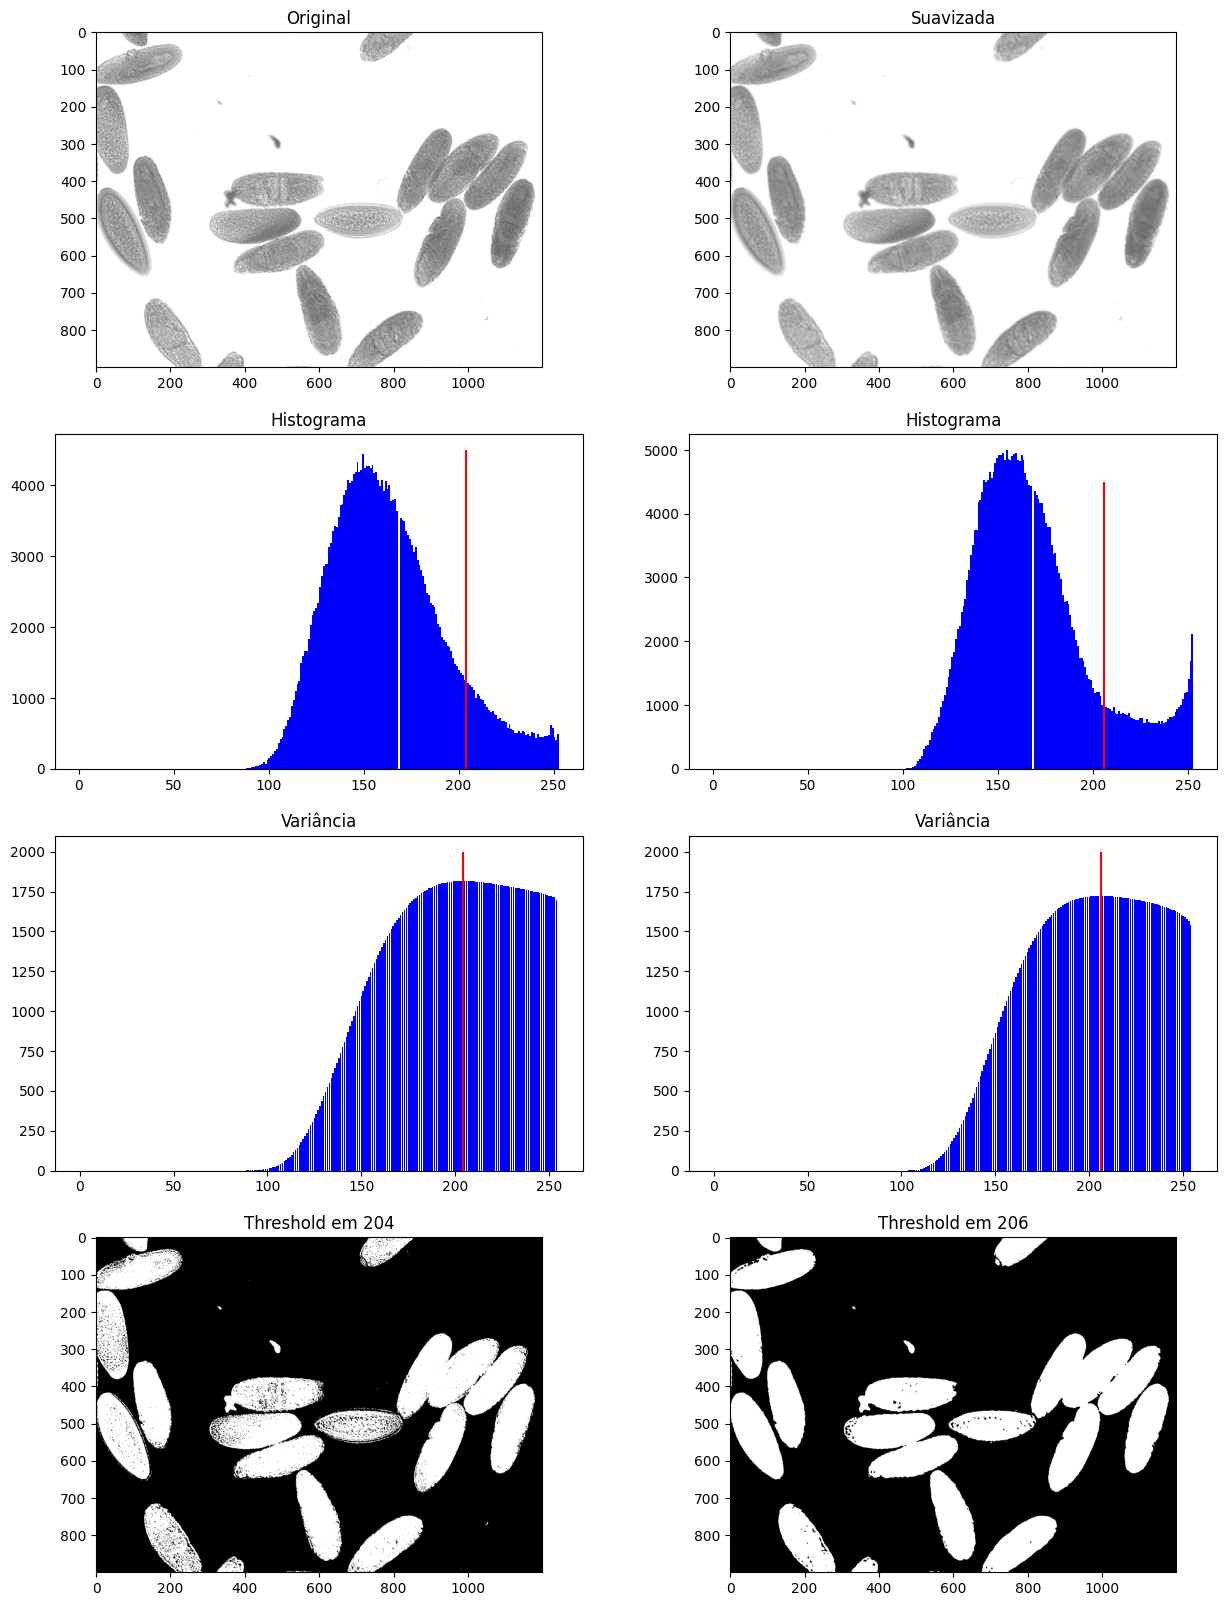

In [4]:
def Otsu(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256]).astype(int)
    hist = hist[::,0]

    sum = (np.sum(hist))
    prob = (1.0 * hist) / sum

    accup = np.zeros(256).astype(float)
    accum = np.zeros(256).astype(float)
    otsu = np.zeros(257).astype(float)

    accup[0] = prob[0]
    accum[0] = 0 * prob[0]

    i = (int)(1)
    while(i < 256):
        accup[i] = accup[i - 1] + prob[i]
        accum[i] = accum[i - 1] + i * prob[i]
        i += 1

    mg = (float)(accum[255])

    va = (float)(0)
    i = (int)(0)
    while(i < 256):
        va += prob[i] * (i - mg)**2
        i += 1

    i = (int)(0)
    while(i < 256):

        if(0 < accup[i] and accup[i] < 1):
            otsu[i] = (float)((mg * accup[i] - accum[i])**2 / (accup[i] * (1 - accup[i])))

        else:
            otsu[i] = 0

        i += 1

    best = (float)(np.max(otsu))

    s = (int)(0)
    q = (int)(0)

    i = (int)(0)

    while(i < 256):

        if(otsu[i] == best):
            s += i
            q += 1

        i += 1
        
    otsu[256] = (1.0 * s) / q

    return otsu


idx = np.zeros(256).astype(int)

i = (int)(1)
while(i < 256):
    idx[i] = i
    i += 1

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.blur(img1, ksize = (5,5))

otsu = Otsu(img1)
lim = (int)(otsu[256])
otsu = otsu[0:256]
img3 = 255 * (img1 <= lim)

otsu2 = Otsu(img2)
lim2 = (int)(otsu2[256])
otsu2 = otsu2[0:256]
img4 = 255 * (img2 <= lim2)

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 3)
plt.title('Histograma')
plt.hist(img1.ravel(),256,[0,253], color = 'blue')

plt.vlines(lim, ymin = 0, ymax = 4500, colors="red")

plt.subplot(4, 2, 5)
plt.title('Variância')

plt.vlines(lim, ymin = 0, ymax = 2000, colors="red")

plt.bar(idx, otsu, color='blue')

plt.subplot(4, 2, 7)
plt.title('Threshold em ' + (str)(lim))
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 2)
plt.title('Suavizada')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 4)
plt.title('Histograma')
plt.hist(img2.ravel(),256,[0,253], color = 'blue')

plt.vlines(lim2, ymin = 0, ymax = 4500, colors="red")

plt.subplot(4, 2, 6)
plt.title('Variância')

plt.vlines(lim2, ymin = 0, ymax = 2000, colors="red")

plt.bar(idx, otsu2, color='blue')

plt.subplot(4, 2, 8)
plt.title('Threshold em ' + (str)(lim2))
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

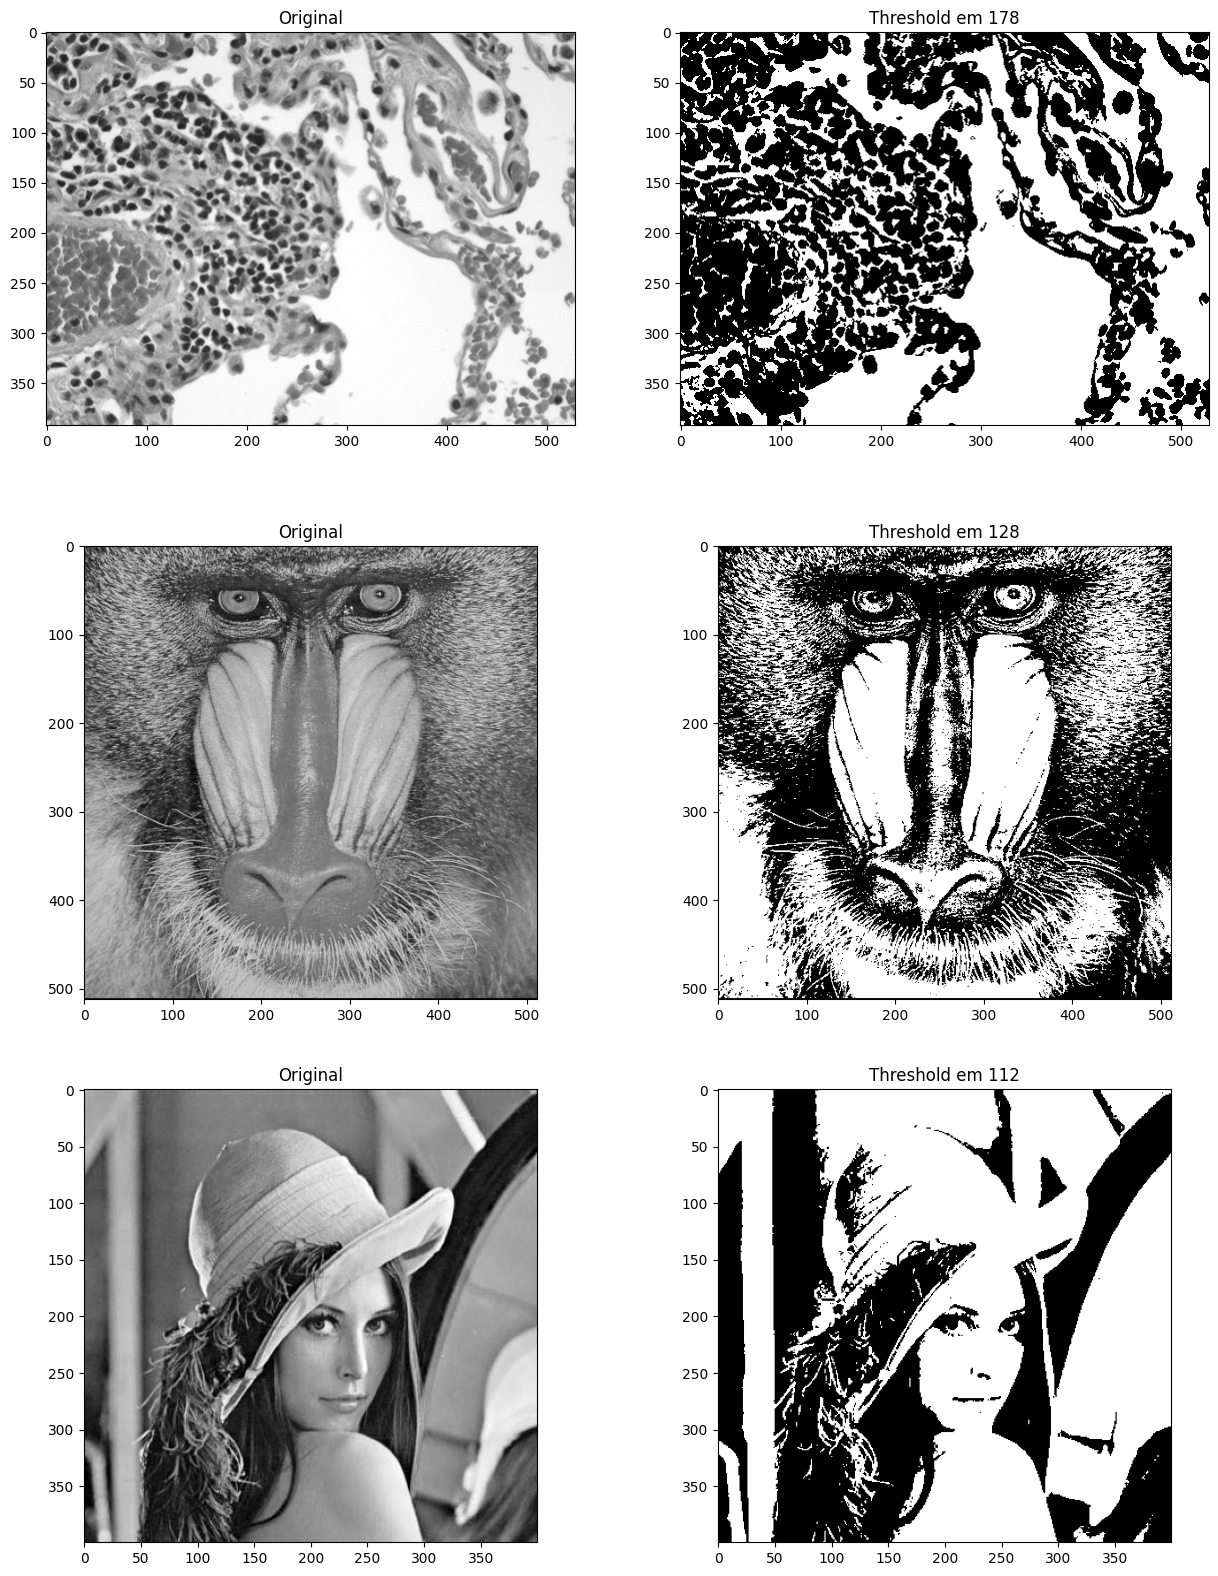

In [5]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)

otsu = Otsu(img1)
lim1 = (int)(otsu[256])
img4 = 255 * (1 - (img1 <= lim1))

otsu = Otsu(img2)
lim2 = (int)(otsu[256])
img5 = 255 * (1 - (img2 <= lim2))

otsu = Otsu(img3)
lim3 = (int)(otsu[256])
img6 = 255 * (1 - (img3 <= lim3))

plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 2)
plt.title('Threshold em ' + (str)(lim1))
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 3)
plt.title('Original')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 4)
plt.title('Threshold em ' + (str)(lim2))
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 5)
plt.title('Original')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 6)
plt.title('Threshold em ' + (str)(lim3))
plt.imshow(img6, cmap='gray', vmin=0, vmax=255)

